<a href="https://colab.research.google.com/github/WellcomePeujio/-Analisis-de-Correlacion-para-Factores-de-Demanda/blob/main/cap20_series_tiempo_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo 20: Tendencia, Estacionalidad y Modelos ARIMA Aplicados a Series de Tiempo Financieras

**Autor:** Wellcome Peujio Jiotsop Foze  
**Libro:** Finanzas 5.0 - Un enfoque moderno basado en datos y Python

---

## Objetivos de aprendizaje

Al finalizar este capitulo, seras capaz de:

1. Comprender que es una serie de tiempo financiera
2. Identificar componentes: tendencia, estacionalidad y ruido
3. Descomponer series de tiempo
4. Convertir series a estacionarias
5. Entrenar un modelo ARIMA basico
6. Generar predicciones de precios futuros
7. Interpretar resultados de forma practica
8. Aplicar ARIMA a decisiones financieras

## 1. Introduccion: Que es una Serie de Tiempo Financiera?

### Datos ordenados en el tiempo

**Serie de tiempo:**
> Secuencia de observaciones ordenadas cronologicamente.

**Caracteristicas:**
- Cada observacion tiene una fecha/hora
- El orden importa (no se puede reorganizar)
- Dependencia temporal (hoy depende de ayer)

**Ejemplos financieros:**
- Precio de cierre diario de una accion
- Volumen de transacciones
- Retornos diarios
- Tasas de interes
- Tipo de cambio
- Indices bursatiles

### Se usan para analizar precios, volumenes, retornos

**Aplicaciones:**
- Analizar tendencias historicas
- Identificar patrones estacionales
- Predecir valores futuros
- Evaluar riesgo
- Tomar decisiones de inversion

**Por que son importantes:**
- Finanzas se basan en datos historicos
- Pasado ayuda a entender el futuro
- Patrones se repiten (no siempre, pero a menudo)

### Clave en finanzas, macro, econometria

**Disciplinas que usan series de tiempo:**

**Finanzas:**
- Trading algoritmico
- Gestion de riesgo
- Valuacion de derivados

**Macroeconomia:**
- PIB
- Inflacion
- Desempleo

**Econometria:**
- Modelos causales
- Prediccion economica

### Tabla de componentes

| Componente | Explicacion | Ejemplo |
|:-----------|:------------|:--------|
| **Tendencia** | Direccion general de largo plazo | Accion que sube constantemente |
| **Estacionalidad** | Patrones repetitivos | Ventas altas en diciembre |
| **Ciclo** | Fluctuaciones de mediano plazo | Ciclos economicos |
| **Ruido** | Variacion aleatoria | Movimientos diarios impredecibles |

**Leccion:**
> Toda serie de tiempo tiene multiples componentes.

## 2. Descargar datos diarios de un activo

Usaremos Apple (AAPL) como ejemplo estandar:

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Descargar datos de Apple
data = yf.download("AAPL", start="2015-01-01", end="2024-01-01", progress=False)["Close"]

print(f"Datos descargados: {len(data)} observaciones")
print(f"Periodo: {data.index[0].date()} a {data.index[-1].date()}")
print(f"\nPrimeras observaciones:")
data.head(10)

Datos descargados: 2264 observaciones
Periodo: 2015-01-02 a 2023-12-29

Primeras observaciones:


Ticker,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554745
2015-01-06,23.556957
2015-01-07,23.887278
2015-01-08,24.805080
2015-01-09,24.831696
2015-01-12,24.219820
2015-01-13,24.434856
2015-01-14,24.341751


### Por que Apple?

**Caracteristicas de AAPL:**
- Empresa estable y liquida
- Datos de alta calidad
- Tendencia clara de largo plazo
- Usado como ejemplo en finanzas

**Periodo seleccionado:**
- 2015-2024: 9 anos de datos
- Incluye crisis y recuperaciones
- Suficiente para analisis de tendencia

## 3. Graficar la serie de tiempo

Visualicemos el precio de cierre:

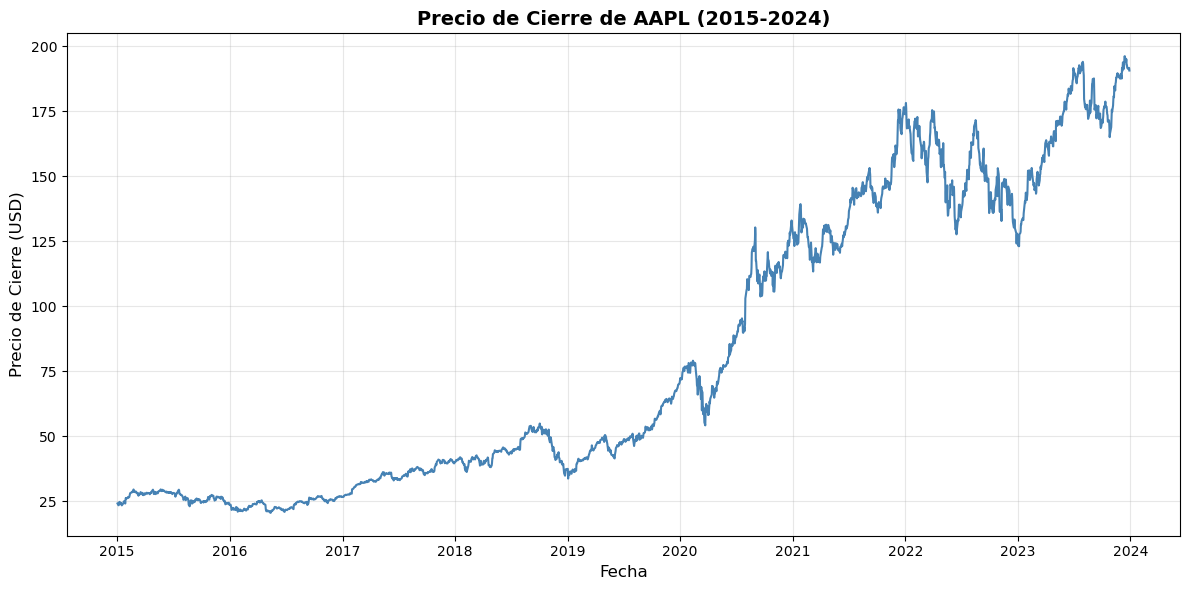

In [ ]:
# Grafica de precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, linewidth=1.5, color='steelblue')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.title('Precio de Cierre de AAPL (2015-2024)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretaciones simples

**Tendencia clara:**
- Observa la direccion general
- AAPL muestra tendencia alcista de largo plazo
- Crecimiento sostenido desde 2015

**Variaciones ciclicas:**
- Subidas y bajadas dentro de la tendencia
- Ciclos de mercado (alcista/bajista)
- Ejemplo: Caida en 2020 (COVID), recuperacion rapida

**Ruido diario:**
- Fluctuaciones pequenas dia a dia
- Movimientos aleatorios
- Dificil de predecir

**Leccion:**
> La grafica muestra que hay estructura (tendencia) y ruido.

## 4. Descomposicion en Tendencia + Estacionalidad + Residual

Usemos statsmodels para descomponer la serie:

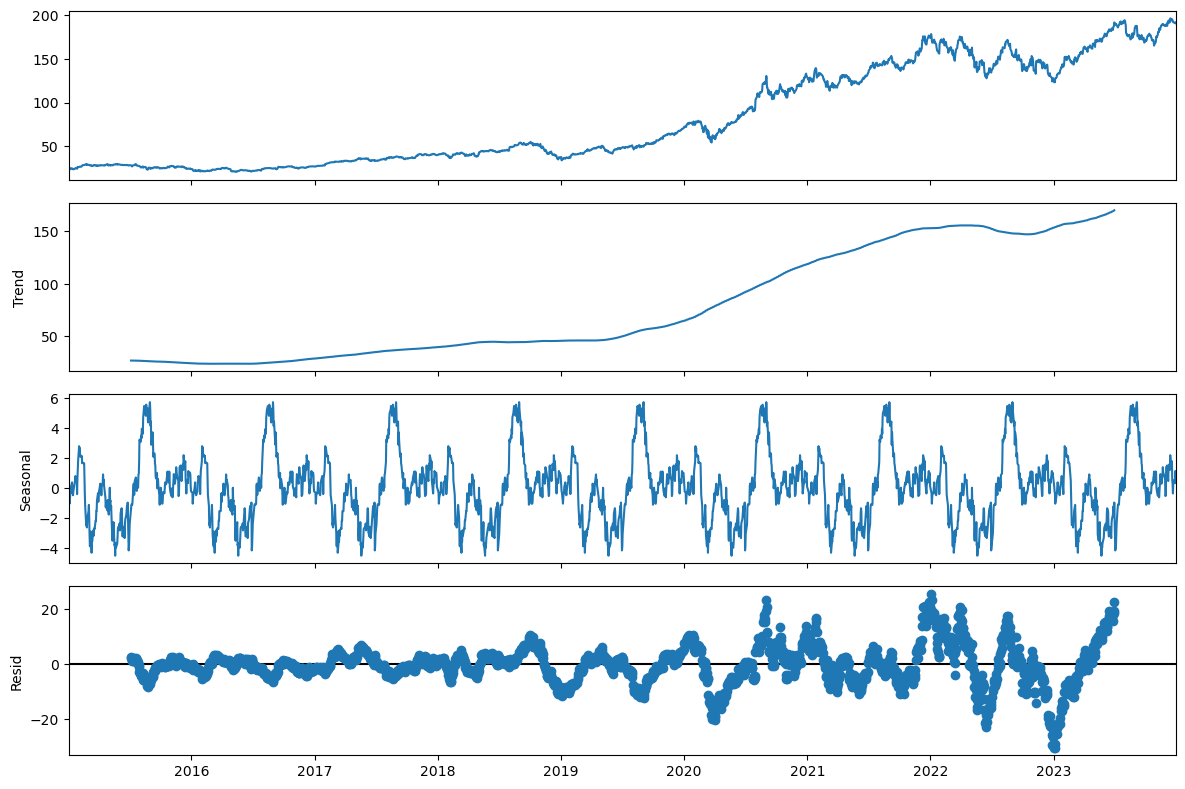

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer serie (modelo aditivo)
# period=252 porque hay aproximadamente 252 dias de trading por ano
descomp = seasonal_decompose(data, model="additive", period=252)

# Graficar componentes
fig = descomp.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

### Interpretacion

**Tendencia (Trend):**
- Comportamiento de largo plazo
- Linea suave que muestra la direccion general
- En AAPL: Tendencia alcista clara

**Estacionalidad (Seasonal):**
- Patrones anuales repetitivos
- En acciones puede ser debil
- Mas fuerte en commodities, retail

**Residuo (Residual):**
- Ruido del mercado
- Lo que no se explica por tendencia ni estacionalidad
- Movimientos aleatorios

**Formula aditiva:**
$$\text{Serie} = \text{Tendencia} + \text{Estacionalidad} + \text{Residuo}$$

**Leccion:**
> Descomponer ayuda a entender que mueve la serie.

## 5. Convertir precios a retornos (serie estacionaria)

ARIMA trabaja mejor con datos estacionarios:

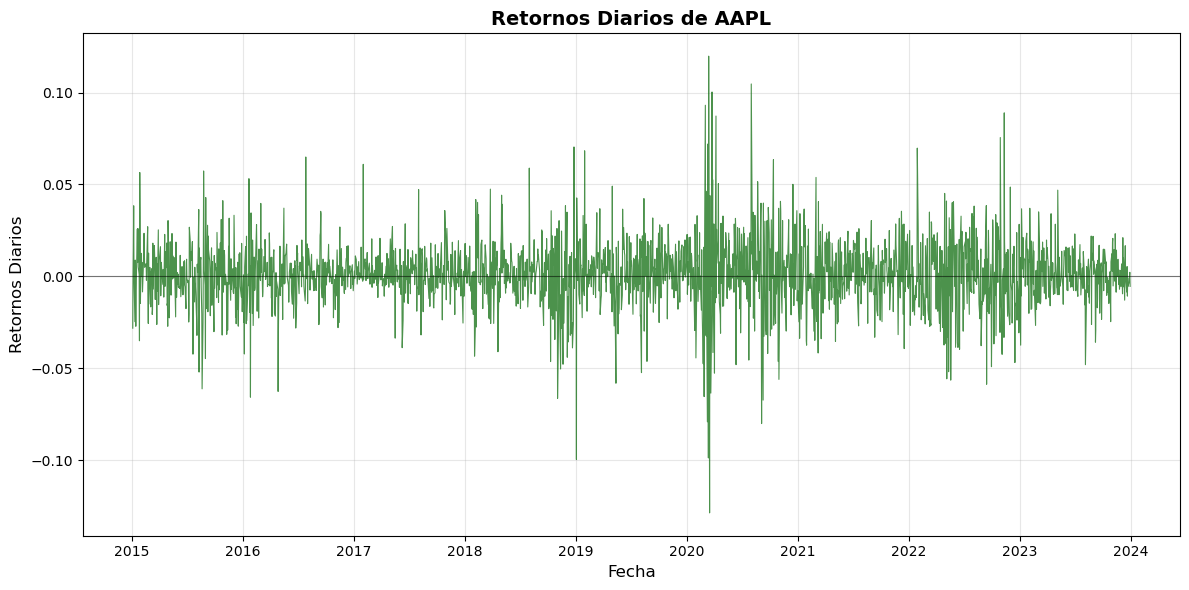

Media de retornos: 0.001079 (27.20% anual)
Volatilidad: 0.018293 (29.04% anual)


In [ ]:
# Calcular retornos diarios
ret = data.pct_change().dropna()
ret = ret.squeeze()   #  línea clave

# Graficar retornos
plt.figure(figsize=(12, 6))
plt.plot(ret.index, ret, linewidth=0.8, alpha=0.7, color="darkgreen")
plt.axhline(0, color="black", linestyle="-", linewidth=0.8, alpha=0.5)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Retornos Diarios", fontsize=12)
plt.title("Retornos Diarios de AAPL", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas (escalares)
mean_ret = float(ret.mean())
std_ret  = float(ret.std())

print(f"Media de retornos: {mean_ret:.6f} ({mean_ret * 252:.2%} anual)")
print(f"Volatilidad: {std_ret:.6f} ({std_ret * np.sqrt(252):.2%} anual)")


### Por qué convertir a retornos?

**Estacionariedad:**
- Serie estacionaria: Media y varianza constantes en el tiempo
- Precios NO son estacionarios (tienen tendencia)
- Retornos SÍ son más estacionarios

**Ventajas de retornos:**
- Elimina tendencia
- Facilita modelado
- ARIMA funciona mejor

**Diferencia vs retornos:**
- **Retornos:**

  $$
  R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
  $$

- **Diferencia:**

  $$
  D_t = P_t - P_{t-1}
  $$

- ARIMA usa diferenciación automáticamente

**Lección:**
> La estacionariedad es clave para modelos de series de tiempo.


## 6. Introducción intuitiva al modelo ARIMA

### ARIMA = AutoRegresivo + Integrado + Media Móvil

**Componentes del modelo:**

**AR (AutoRegresivo):**
- Depende del pasado
- Valor de hoy depende de valores anteriores
- Ejemplo:

  $$
  P_t = a \cdot P_{t-1} + \varepsilon_t
  $$

**I (Integrado):**
- Diferenciar para hacer estacionario
- Restar valor anterior
- Elimina tendencia

  Diferencia:

  $$
  D_t = P_t - P_{t-1}
  $$

**MA (Media Móvil):**
- Depende de shocks pasados
- Errores de predicción anteriores
- Suaviza ruido

**Notación ARIMA(p,d,q):**
- **p** = Orden AR (cuántos lags usar)
- **d** = Orden de diferenciación (cuántas veces diferenciar)
- **q** = Orden MA (cuántos errores pasados usar)

**Ejemplo: ARIMA(1,1,1)**
- **AR(1):** Usa 1 lag

  $$
  P_t = \phi_1 P_{t-1} + \varepsilon_t
  $$

- **I(1):** Diferencia 1 vez

  $$
  D_t = P_t - P_{t-1}
  $$

- **MA(1):** Usa 1 error pasado

  $$
  \varepsilon_t = \theta_1 \varepsilon_{t-1} + u_t
  $$

**Lección:**
> ARIMA combina pasado + diferenciación + errores.


### No matematicas avanzadas

**Enfoque practico:**
- No vamos a derivar formulas
- No vamos a calcular manualmente
- Usaremos Python para todo
- Enfoque en interpretacion

**Objetivo:**
- Entrenar modelo
- Generar predicciones
- Interpretar resultados
- Aplicar a finanzas

**Leccion:**
> Python hace el trabajo pesado, tu interpretas.

### El objetivo del capítulo es usar ARIMA(1,1,1)

**¿Por qué ARIMA(1,1,1)?**
- Simple pero efectivo
- Buen punto de partida
- Fácil de interpretar
- Usado en la práctica

**Orden de complejidad:**
- **ARIMA(0,0,0)** = Ruido blanco  
- **ARIMA(1,0,0)** = AR(1)

  $$
  P_t = \phi_1 P_{t-1} + \varepsilon_t
  $$

- **ARIMA(0,1,0)** = Random walk

  $$
  P_t = P_{t-1} + \varepsilon_t
  $$

- **ARIMA(1,1,1)** = Modelo completo básico

  $$
  (P_t - P_{t-1}) = \phi_1 (P_{t-1} - P_{t-2}) + \theta_1 \varepsilon_{t-1} + \varepsilon_t
  $$

**Lección:**
> Empieza simple, luego complejiza si es necesario.


## 7. Entrenar un modelo ARIMA(1,1,1)

Estimemos el modelo con los datos de Apple:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Crear modelo ARIMA(1,1,1)
modelo = ARIMA(data, order=(1,1,1))

# Entrenar modelo
resultado = modelo.fit()

# Mostrar resumen
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4516.809
Date:                Thu, 01 Jan 2026   AIC                           9039.619
Time:                        22:05:27   BIC                           9056.792
Sample:                             0   HQIC                          9045.885
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3987      0.251      1.590      0.112      -0.093       0.890
ma.L1         -0.4384      0.247     -1.772      0.076      -0.923       0.047
sigma2         3.1708      0.047     67.227      0.0

### Interpretación simple

**No entrar en significancia estadística:**
- Ignora p-values por ahora
- Ignora t-stats
- Enfócate en predicción

**Foco en la capacidad de pronóstico:**
- Lo importante es si predice bien
- No si los parámetros son "significativos"
- Evaluación visual es suficiente

**Parámetros del modelo:**
- **ar.L1:** Coeficiente AR
- **ma.L1:** Coeficiente MA
- **sigma2:** Varianza del error

**Lección:**
> Modelo entrenado, listo para predecir.


## 8. Prediccion de los proximos 30 dias

Generemos predicciones:

In [ ]:
# Predecir próximos 30 días
pred = resultado.forecast(steps=30)

print("Predicciones para los proximos 30 dias:")
print(pred)

#EXTRA ER ESCALARES (CLAVE)
precio_actual = float(data.iloc[-1])
precio_pred_30 = float(pred.iloc[-1])

cambio_esperado = (precio_pred_30 / precio_actual) - 1

print(f"\nPrecio actual: ${precio_actual:.2f}")
print(f"Precio predicho (día 30): ${precio_pred_30:.2f}")
print(f"Cambio esperado: {cambio_esperado:.2%}")

Predicciones para los proximos 30 dias:
2264    190.765975
2265    190.780807
2266    190.786720
2267    190.789078
2268    190.790018
2269    190.790393
2270    190.790542
2271    190.790602
2272    190.790626
2273    190.790635
2274    190.790639
2275    190.790640
2276    190.790641
2277    190.790641
2278    190.790641
2279    190.790641
2280    190.790641
2281    190.790641
2282    190.790641
2283    190.790641
2284    190.790641
2285    190.790641
2286    190.790641
2287    190.790641
2288    190.790641
2289    190.790641
2290    190.790641
2291    190.790641
2292    190.790641
2293    190.790641
Name: predicted_mean, dtype: float64

Precio actual: $190.73
Precio predicho (día 30): $190.79
Cambio esperado: 0.03%


### Graficar predicciones junto al historico

Visualicemos las predicciones:

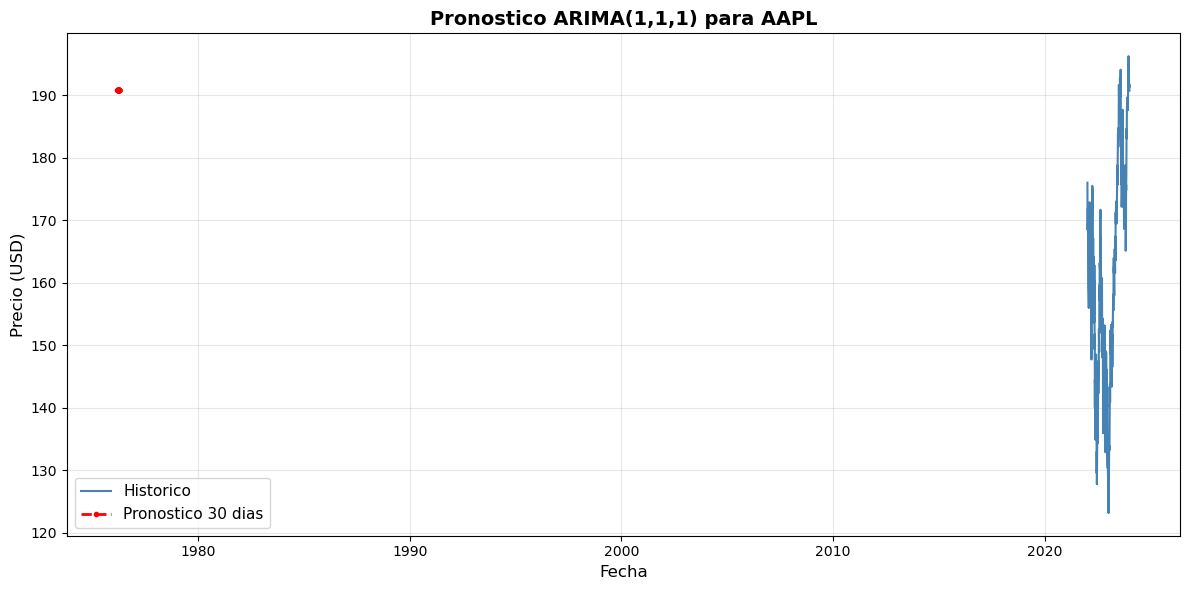

In [ ]:
# Graficar historico y prediccion
plt.figure(figsize=(12, 6))

# Historico (ultimos 500 dias para mejor visualizacion)
plt.plot(data.index[-500:], data.iloc[-500:], label='Historico', linewidth=1.5, color='steelblue')

# Prediccion
plt.plot(pred.index, pred, label='Pronostico 30 dias', linewidth=2, color='red', linestyle='--', marker='o', markersize=3)

plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.title('Pronostico ARIMA(1,1,1) para AAPL', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretacion

**Captura tendencia:**
- El modelo identifica la direccion general
- Prediccion sigue la tendencia reciente
- No predice cambios bruscos

**Suaviza ruido:**
- Prediccion es mas suave que datos reales
- Elimina fluctuaciones diarias
- Muestra direccion esperada

**Util para analisis cualitativos (no trading automatico):**
- No uses ARIMA para trading de alta frecuencia
- Util para planificacion de mediano plazo
- Complementa con otros analisis

**Limitaciones:**
- No predice crisis
- No captura eventos inesperados
- Asume que patrones continuan

**Leccion:**
> ARIMA da direccion, no certeza.

## 9. Caso practico: "Como predecir precios futuros de AAPL con ARIMA?"

Proceso completo paso a paso:

In [ ]:
print("-"*70)
print("CASO PRACTICO: PREDICCION DE PRECIOS CON ARIMA")
print("="*70)

# 1. Descomposicion
print("\n1. DESCOMPOSICION:")
print(" - Tendencia: Alcista de largo plazo")
print(" - Estacionalidad: Debil en acciones")
print(" - Residuo: Ruido de mercado")

# 2. Estacionariedad
print("\n2. ESTACIONARIEDAD:")
print(f" - Media de retornos: {mean_ret:.6f}")
print(f" - Volatilidad: {std_ret:.6f}")
print(" - Serie de retornos es aproximadamente estacionaria")

# 3. Entrenamiento
print("\n3. ENTRENAMIENTO:")
print(" - Modelo: ARIMA(1,1,1)")
print(" - Datos: 2015-2024")
print(" - Observaciones:", len(data))

# 4. Prediccion
print("\n4. PREDICCION:")
print(" - Horizonte: 30 dias")
print(f" - Precio actual: ${precio_actual:.2f}")
print(f" - Precio predicho (dia 30): ${precio_pred_30:.2f}")
print(f" - Cambio esperado: {cambio_esperado:.2%}")

# 5. Interpretacion
print("\n5. INTERPRETACION:")
if precio_pred_30 > precio_actual:
    print(" - Modelo predice SUBIDA")
    print(" - Tendencia alcista continua")
    print(" - Considerar mantener/comprar")
else:
    print(" - Modelo predice BAJADA")
    print(" - Tendencia bajista")
    print(" - Considerar vender/esperar")

# 6. Decision
print("\n6. DECISION:")
print(" - No tomar decision solo con ARIMA")
print(" - Combinar con analisis fundamental")
print(" - Considerar riesgo y volatilidad")
print(" - Diversificar portafolio")

print("\n" + "="*70)


----------------------------------------------------------------------
CASO PRACTICO: PREDICCION DE PRECIOS CON ARIMA

1. DESCOMPOSICION:
 - Tendencia: Alcista de largo plazo
 - Estacionalidad: Debil en acciones
 - Residuo: Ruido de mercado

2. ESTACIONARIEDAD:
 - Media de retornos: 0.001079
 - Volatilidad: 0.018293
 - Serie de retornos es aproximadamente estacionaria

3. ENTRENAMIENTO:
 - Modelo: ARIMA(1,1,1)
 - Datos: 2015-2024
 - Observaciones: 2264

4. PREDICCION:
 - Horizonte: 30 dias
 - Precio actual: $190.73
 - Precio predicho (dia 30): $190.79
 - Cambio esperado: 0.03%

5. INTERPRETACION:
 - Modelo predice SUBIDA
 - Tendencia alcista continua
 - Considerar mantener/comprar

6. DECISION:
 - No tomar decision solo con ARIMA
 - Combinar con analisis fundamental
 - Considerar riesgo y volatilidad
 - Diversificar portafolio



### Objetivo: Que el lector sienta que ya puede hacer un analisis predictivo real

**Lo que acabas de hacer:**
- Descargaste datos reales
- Descompusiste la serie
- Entrenaste un modelo ARIMA
- Generaste predicciones
- Interpretaste resultados

**Esto es analisis predictivo real:**
- Usado en la industria
- Base para modelos mas avanzados
- Herramienta profesional

**Leccion:**
> Ya puedes hacer analisis predictivo con Python.

## 10. Ejercicios guiados

Practica con diferentes configuraciones y activos.

### Ejercicio 1: Usa ARIMA(2,1,2) y compara resultados

Ejercicio 1: Comparacion ARIMA(1,1,1) vs ARIMA(2,1,2)

ARIMA(1,1,1) - Precio dia 30: $190.79
ARIMA(2,1,2) - Precio dia 30: $190.79
Diferencia: $0.00


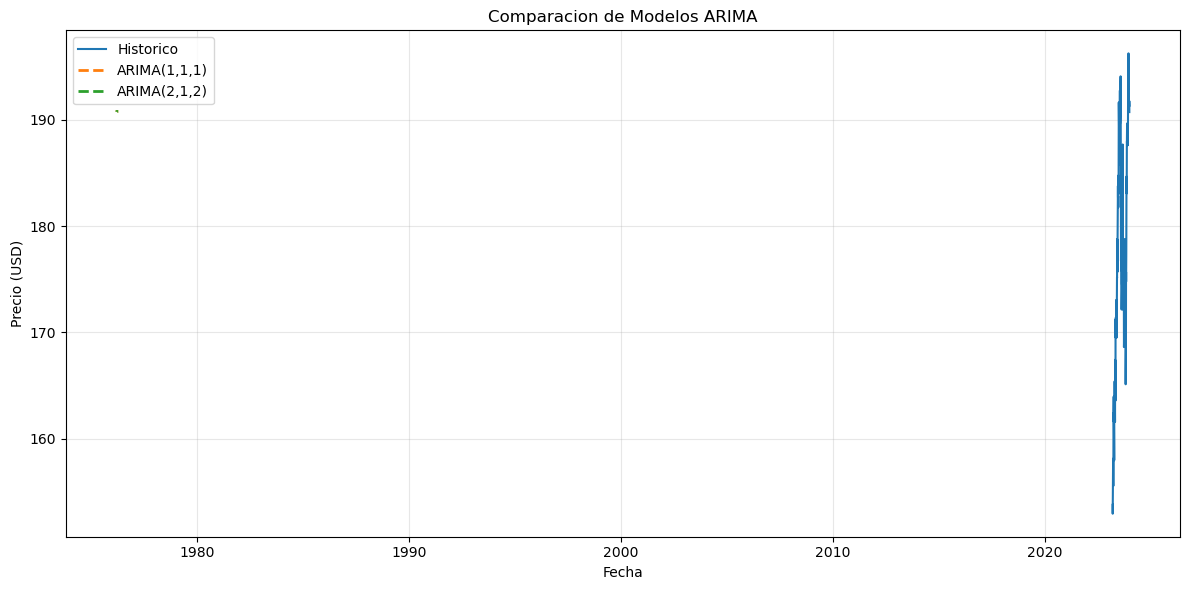

In [ ]:
# EJERCICIO 1: ARIMA(2,1,2)
modelo_212 = ARIMA(data, order=(2,1,2))
resultado_212 = modelo_212.fit()
pred_212 = resultado_212.forecast(steps=30)

print("Ejercicio 1: Comparacion ARIMA(1,1,1) vs ARIMA(2,1,2)")
print(f"\nARIMA(1,1,1) - Precio dia 30: ${pred.iloc[-1]:.2f}")
print(f"ARIMA(2,1,2) - Precio dia 30: ${pred_212.iloc[-1]:.2f}")
print(f"Diferencia: ${abs(pred.iloc[-1] - pred_212.iloc[-1]):.2f}")

# Graficar comparacion
plt.figure(figsize=(12, 6))
plt.plot(data.index[-200:], data.iloc[-200:], label='Historico', linewidth=1.5)
plt.plot(pred.index, pred, label='ARIMA(1,1,1)', linewidth=2, linestyle='--')
plt.plot(pred_212.index, pred_212, label='ARIMA(2,1,2)', linewidth=2, linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Comparacion de Modelos ARIMA')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Ejercicio 2: Prueba con MSFT

In [ ]:
# EJERCICIO 2: Microsoft
data_msft = yf.download(
    "MSFT",
    start="2015-01-01",
    end="2024-01-01",
    progress=False
)["Close"]

modelo_msft = ARIMA(data_msft, order=(1,1,1))
resultado_msft = modelo_msft.fit()
pred_msft = resultado_msft.forecast(steps=30)

# ESCALARES (CLAVE)
precio_actual_msft = float(data_msft.iloc[-1])
precio_pred_30_msft = float(pred_msft.iloc[-1])
cambio_esperado_msft = (precio_pred_30_msft / precio_actual_msft) - 1

print("Ejercicio 2: Prediccion para MSFT")
print(f"\nPrecio actual: ${precio_actual_msft:.2f}")
print(f"Precio predicho (dia 30): ${precio_pred_30_msft:.2f}")
print(f"Cambio esperado: {cambio_esperado_msft:.2%}")


Ejercicio 2: Prediccion para MSFT

Precio actual: $370.52
Precio predicho (dia 30): $370.35
Cambio esperado: -0.04%


### Ejercicio 3: Haz un pronostico de 60 dias

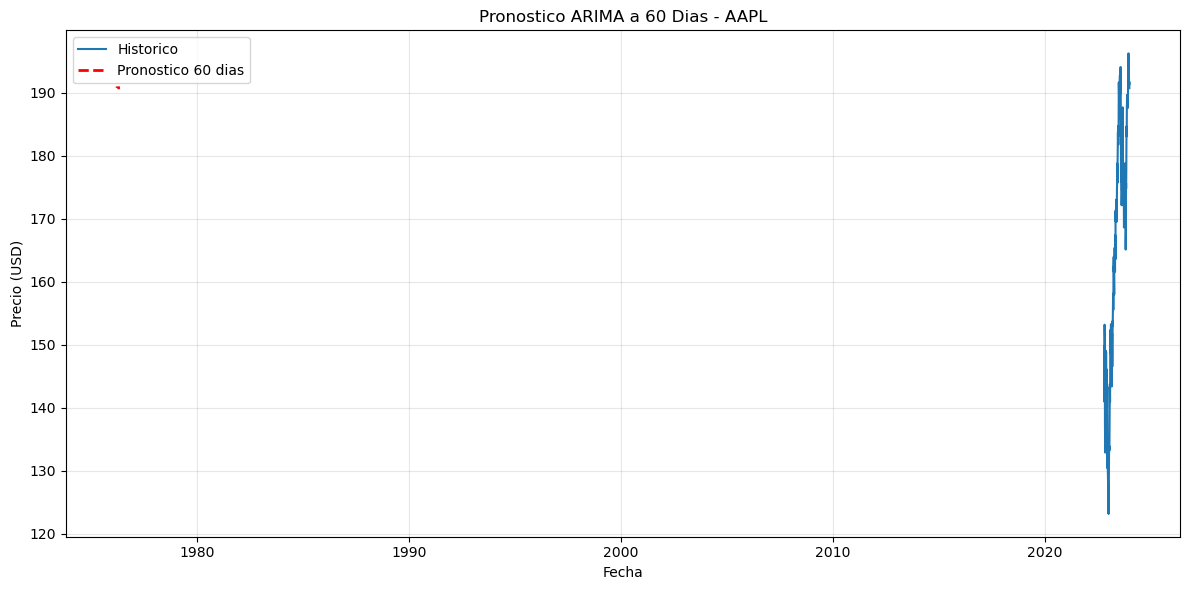

Ejercicio 3: Pronostico a 60 dias
Precio predicho (dia 60): $190.79


In [ ]:
# EJERCICIO 3: Pronostico 60 dias
pred_60 = resultado.forecast(steps=60)

plt.figure(figsize=(12, 6))
plt.plot(data.index[-300:], data.iloc[-300:], label='Historico', linewidth=1.5)
plt.plot(pred_60.index, pred_60, label='Pronostico 60 dias', linewidth=2, color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Pronostico ARIMA a 60 Dias - AAPL')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Ejercicio 3: Pronostico a 60 dias")
print(f"Precio predicho (dia 60): ${pred_60.iloc[-1]:.2f}")

### Ejercicio 4: Compara prediccion en retornos vs prediccion en precios

In [ ]:
# EJERCICIO 4: ARIMA en retornos
modelo_ret = ARIMA(ret, order=(1,0,1))  # Sin diferenciacion porque retornos ya son estacionarios
resultado_ret = modelo_ret.fit()
pred_ret = resultado_ret.forecast(steps=30)

print("Ejercicio 4: ARIMA en retornos vs precios")
print(f"\nPrediccion en precios (dia 30): ${pred.iloc[-1]:.2f}")
print(f"Retorno promedio predicho: {pred_ret.mean():.6f}")
print(f"Volatilidad predicha: {pred_ret.std():.6f}")

Ejercicio 4: ARIMA en retornos vs precios

Prediccion en precios (dia 30): $190.79
Retorno promedio predicho: 0.001096
Volatilidad predicha: 0.000090


### Ejercicio 5: Descompone estacionalidad mensual (period=21)

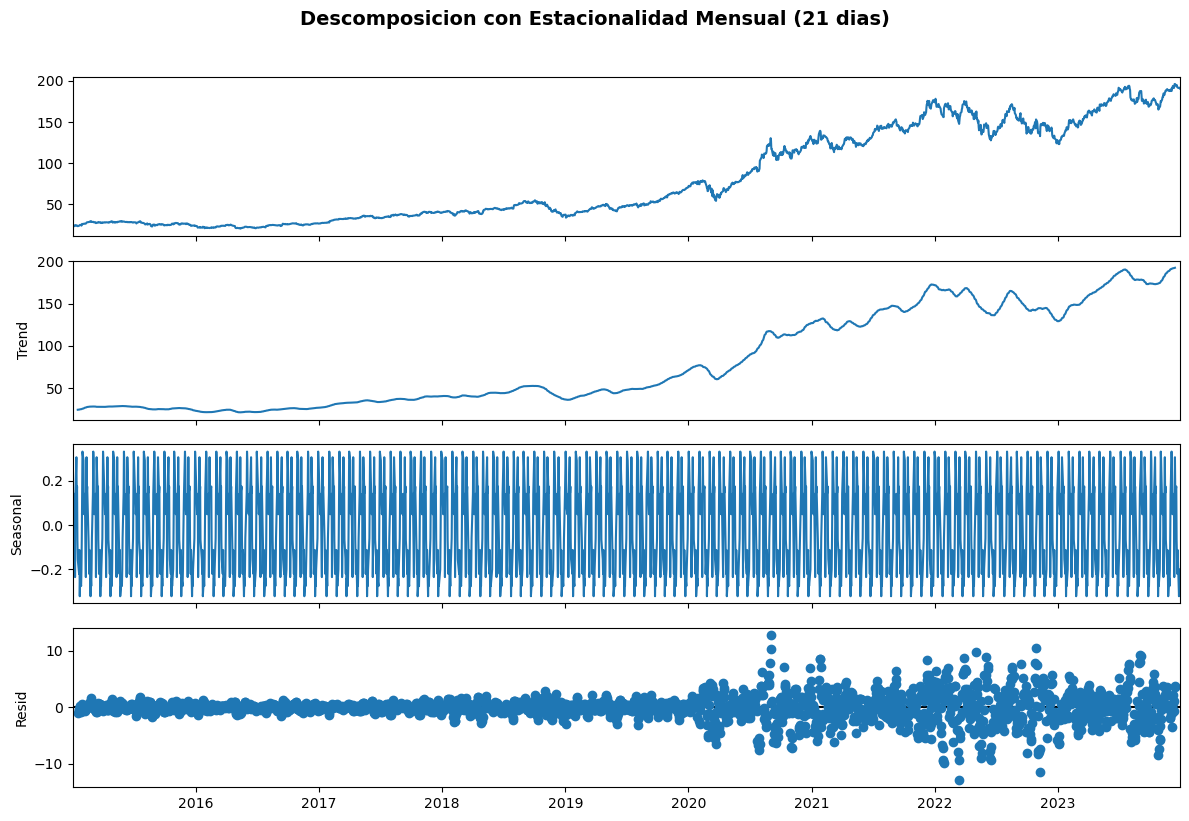

Ejercicio 5: Estacionalidad mensual
Grafica muestra patrones mensuales en vez de anuales


In [ ]:
# EJERCICIO 5: Estacionalidad mensual
descomp_mensual = seasonal_decompose(data, model="additive", period=21)

fig = descomp_mensual.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposicion con Estacionalidad Mensual (21 dias)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Ejercicio 5: Estacionalidad mensual")
print("Grafica muestra patrones mensuales en vez de anuales")

### Ejercicio 6: Intenta modelo sin diferenciacion (ARMA)

In [ ]:
# EJERCICIO 6: ARMA (sin diferenciacion)
# Usar retornos que ya son estacionarios
modelo_arma = ARIMA(ret, order=(1,0,1))
resultado_arma = modelo_arma.fit()

print("Ejercicio 6: Modelo ARMA(1,1)")
print("\nARMA es ARIMA sin diferenciacion (d=0)")
print("Util cuando la serie ya es estacionaria (como retornos)")
print(f"\nAIC: {resultado_arma.aic:.2f}")
print(f"BIC: {resultado_arma.bic:.2f}")

Ejercicio 6: Modelo ARMA(1,1)

ARMA es ARIMA sin diferenciacion (d=0)
Util cuando la serie ya es estacionaria (como retornos)

AIC: -11694.64
BIC: -11671.74


## 11. Cierre del capitulo

### Que aprendiste en este capitulo?

Felicidades por completar el Capitulo 20. Ahora comprendes como analizar y predecir series de tiempo.

**Conceptos clave:**

1. **Serie de tiempo:** Datos ordenados cronologicamente

2. **Componentes:** Tendencia, estacionalidad, ruido

3. **Descomposicion:** Separar componentes

4. **Estacionariedad:** Necesaria para ARIMA

5. **ARIMA:** Modelo predictivo basico

6. **Prediccion:** Pronostico de valores futuros

### Que es tendencia y estacionalidad

**Tendencia:**
> Direccion general de largo plazo de una serie.

**Estacionalidad:**
> Patrones repetitivos en intervalos regulares.

**Ruido:**
> Variacion aleatoria no explicada.

### Como descomponer series

**Proceso:**
1. Importar seasonal_decompose
2. Especificar modelo (aditivo/multiplicativo)
3. Definir periodo (252 para anual, 21 para mensual)
4. Graficar componentes

**Formula aditiva:**
$$\text{Serie} = \text{Tendencia} + \text{Estacionalidad} + \text{Residuo}$$

### Como entrenar un ARIMA basico

**Pasos:**
1. Importar datos
2. Verificar estacionariedad (o diferenciar)
3. Definir orden (p,d,q)
4. Crear modelo con ARIMA()
5. Entrenar con .fit()
6. Analizar resumen

### Como realizar predicciones

**Proceso:**
1. Modelo entrenado
2. Usar .forecast(steps=n)
3. Obtener predicciones
4. Graficar junto al historico
5. Interpretar resultados

### Como interpretar graficas

**Elementos clave:**
- Historico vs prediccion
- Tendencia de la prediccion
- Suavidad de la prediccion
- Incertidumbre (no mostrada en basico)

**Leccion:**
> Prediccion es direccion, no certeza.

### Como esto se conecta con analisis de riesgo, decisiones y modelado mas avanzado

**Conexiones:**

**Analisis de riesgo:**
- Predecir volatilidad futura
- Estimar VaR dinamico
- Planificar escenarios

**Decisiones:**
- Timing de compra/venta
- Rebalanceo de portafolio
- Cobertura de riesgo

**Modelado avanzado:**
- ARIMA es base para GARCH
- ARIMA es base para VAR (Vector Autoregression)
- ARIMA es base para modelos de ML

### Preparacion para el Capitulo 21

En el proximo capitulo exploraremos:

**Redes Neuronales para Series de Tiempo - Introduccion a LSTM con Python (version simple)**

Aprenderemos:
- Que son redes neuronales
- Como funcionan LSTM
- Predecir precios con deep learning
- Comparar LSTM vs ARIMA
- Aplicaciones en finanzas

### Reflexion final

Has aprendido a analizar series de tiempo:

**ARIMA:**
> Modelo clasico y efectivo

**Descomposicion:**
> Entender componentes

**Prediccion:**
> Pronosticar futuros

**Lecciones practicas:**

1. **Series tienen estructura**
   - Tendencia
   - Estacionalidad
   - Ruido

2. **Estacionariedad importa**
   - Necesaria para ARIMA
   - Diferenciar si es necesario

3. **ARIMA es util**
   - Simple pero efectivo
   - Ampliamente usado

4. **Python facilita**
   - statsmodels
   - Facil de implementar

**Recuerda:**
- ARIMA no es perfecto
- Prediccion != Certeza
- Combina con otros analisis
- Evalua resultados constantemente

**Practica:**
- Prueba diferentes ordenes (p,d,q)
- Compara activos
- Analiza residuos
- Mejora predicciones

---

**Nos vemos en el Capitulo 21!**